In [1]:
import numpy as np
import pandas as pd
import requests
import json
import datetime

In [2]:
url1 = "https://ptabdata.uspto.gov/ptab-api/trials?filingDateFrom=2019-09-01&filingDateTo=2019-09-20&limit=100"
url2 = "https://ptabdata.uspto.gov/ptab-api/trials?filingDateFrom=2019-09-21&filingDateTo=2019-09-30&limit=100"

In [3]:
ptab1 = requests.get(url1).json()
ptab2 = requests.get(url2).json()

In [6]:
ptab_df_1 = pd.DataFrame(ptab1['results'])
ptab_df_2 = pd.DataFrame(ptab2['results'])

In [7]:
ptab_df = pd.concat([ptab_df_1,ptab_df_2])

In [8]:
ptab_df = ptab_df.loc[:, ptab_df.columns!='links']

In [9]:
def make_clickable(number):
    return '<a href=https://patents.google.com/patent/US{}>{}</a>'.format(number, number)
df = ptab_df.drop(['prosecutionStatus', 'trialName'], axis = 1)
#df.style.format({'patentNumber':make_clickable})

In [10]:
df.reset_index(drop=True).style.format({'patentNumber':make_clickable})

,accordedFilingDate,applicationNumber,filingDate,lastModifiedDatetime,patentNumber,patentOwnerName,petitionerPartyName,trialNumber
0,2019-09-16,14510965,2019-09-16,2019-10-07T15:28:16,9311485,"Etchegoyen, Craig S.",Microsoft Corporation,IPR2019-01443
1,2019-09-05,09223860,2019-09-05,2019-09-19T19:12:21,6282317,LUO et al,Robert Bosch LLC,IPR2019-01472
2,2019-09-05,09736825,2019-09-05,2019-09-19T19:18:02,6654507,"Luo, Jiebo",Robert Bosch LLC,IPR2019-01473
3,2019-09-05,09490915,2019-09-05,2019-10-04T09:29:18,6654506,Luo et al,Robert Bosch LLC,IPR2019-01474
4,2019-09-05,10225720,2019-09-05,2019-10-04T09:32:11,7035461,Luo et al,"Robert Bosch, LLC",IPR2019-01475
5,2019-09-05,09998622,2019-09-05,2019-10-04T09:34:34,7148908,Riek et al,Robert Bosch LLC,IPR2019-01476
6,2019-09-03,12393768,2019-09-03,2019-09-19T19:25:42,8450475,"Lebreton, Pierre F.","Prollenium US, Inc.",IPR2019-01505
7,2019-10-03,12393884,2019-09-20,2019-10-03T07:32:07,8357795,"Lebreton, Pierre F.","Prollenium US, Inc.",IPR2019-01506
8,2019-09-03,13891052,2019-09-03,2019-09-19T19:37:24,9358322,"Lebreton, Pierre F.","Prollenium US, Inc.",IPR2019-01509
9,2019-10-03,09760619,2019-09-14,2019-10-03T08:19:16,7440572,Dellmo et al,Huawei Technologies Co. Ltd.,IPR2019-01512


Text(0, 0.5, 'Count of filings')

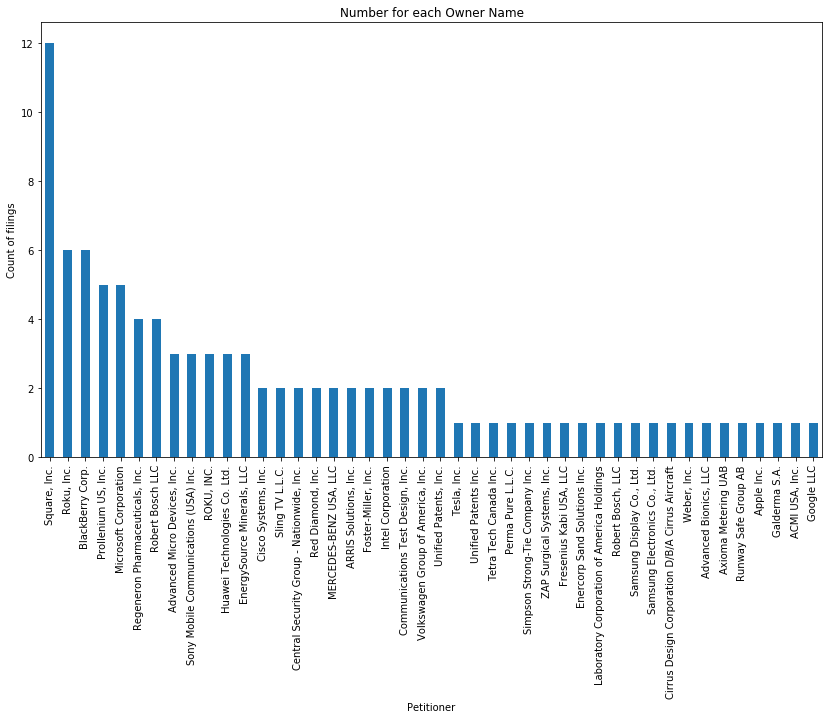

In [11]:
ax = df['petitionerPartyName'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each Owner Name")
ax.set_xlabel("Petitioner")
ax.set_ylabel("Count of filings")